c:\Users\ttnch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


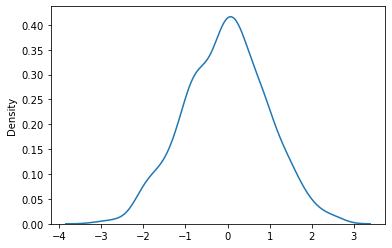

In [2]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_array = random.normal(size=1000)
sns.distplot(random_array, hist=False)

plt.show() 

In [3]:
series = pd.Series(random_array)

Перед вами нормально-распределенный массив сконвертированный в Pandas Series. Необходимо расчитать следующие статистики для массива (series), используя только собственно-написанные формулы:
* среднее значение 
* медиану 
* стандартное отклонение
* межквартильный размах
* 23-й перцентиль


In [9]:
series

0      0.864871
1     -1.194881
2      0.055805
3      0.014133
4     -0.622970
         ...   
995   -1.121673
996    0.931393
997   -0.883568
998   -1.664525
999   -1.650749
Length: 1000, dtype: float64

Средняя (1-й способ)

In [7]:
total = sum(series)
length = len(series)
print(f'Среднее значение ряда {total/length}')

Среднее значение ряда -0.042258080226084946


Средняя (2-й способ)

In [10]:
from functools import reduce 
avg = reduce(lambda x, y: x + y, series)/length
print(f'Среднее значение ряда {avg}') 

Среднее значение ряда -0.042258080226084946


Проверка средней

In [11]:
print(np.average(series)) # проверка по Numpy

-0.04225808022608493


In [12]:
print(sum(series) / series.count()) # проверка по Pandas

-0.042258080226084946


Вывод: средние, рассчитанные арифиметическими методами, совпадают. Встроенная функция Numpy дает разницу в 15-18-м знаке после запятой, в зависимости от случайного ряда. Расчет по встроенной функции Pandas совпадает с арифметическим расчетом.

# Медиана

In [13]:
series_rang = series.sort_values().reset_index(drop=True)
ind = len(series_rang) /2
from math import floor
ind = floor(ind)
if ind%2 != 0:
    med = series_rang[ind-1]
else:
    med = (series_rang[ind-1] + series_rang[ind]) / 2
print(f'Медиана равна {med}')
    

Медиана равна -0.025106933479391143


Проверка медианы

In [115]:
import statistics # проверка по Python
statistics.median(series)

0.0020206053847865225

In [127]:
series.median() # проверка по Pandas

0.0020206053847865225

In [116]:
print(np.percentile (series, 50)) # проверка по Numpy

0.0020206053847865225


Вывод: медиана, рассчитанная с помощью срезов ранжированного списка, совпадает с расчетом по модулю statistics от Python, расчетом в Pandas, а также с 50-м перцентилем.

Стандартное отклонение (для ген.совокупности)

In [18]:
total = 0
for i in series:
    total = total + (i - avg)**2
st_dev = (total / len(series))**(1/2)
print(f'Стандартное отклонение равно {st_dev}')

Стандартное отклонение равно 0.9756251526751751


In [ ]:
Стандартное отклонение (для выборки)

In [21]:
total = 0
for i in series:
    total = total + (i - avg)**2
st_dev = (total / (len(series) - 1))**(1/2)
print(f'Стандартное отклонение равно {st_dev}')

Стандартное отклонение равно 0.9761133314160948


Проверка стандартного отклонения

In [20]:
np.std(series) # проверка по Numpy

0.9756251526751751

In [19]:
series.std() # проверка по Pandas

0.9761133314160948

Вывод: в Numpy дисперсия рассчитывается без смещения (для генеральной совокупности). В Pandas берется дисперсия со смещением (n- ) для выборки.

Межквартильный размах

In [119]:
index_perc = int(len(series) / 4)
percent_25_row = series_rang[index_perc-2:index_perc+1]
print(percent_25_row)
percent_75_row = series_rang[3*index_perc-2:3*index_perc+1]
print(percent_75_row)
interquarter = series_rang[3*index_perc-1] - series_rang[index_perc-1]
interquarter

248   -0.672486
249   -0.662676
250   -0.662404
dtype: float64
748    0.691929
749    0.694910
750    0.695540
dtype: float64


1.3575856131678372

Проверка межквартильного размаха

In [120]:
q3, q1 = np.percentile (series, [75 ,25]) # Numpy
print(q1)
print(q3)
iqr = q3 - q1
iqr

-0.6624718186275123
0.6950672287304188


1.357539047357931

In [129]:
series.describe() #Pandas

count    1000.000000
mean        0.023207
std         1.011716
min        -2.938704
25%        -0.662472
50%         0.002021
75%         0.695067
max         3.564177
dtype: float64

Вывод: при расчете межквартильного размаха Numpy пользуется не самими значениями ряда, а некими расчетными значениями. Либо функция сортировки обрезает лишние знаки у ранжированного ряда, использованного в моем расчете.
В результате значения IQR отличаются в 3-4 знаке после запятой.
Метод describe от Pandas дает значения, совпадающие с Numpy, но с округлением до 6 знаков после запятой.

23-й перцентиль

In [121]:
print(series_rang[229]) # если срез начинается с 0, берем 229, чтобы получить 230
print(series_rang[230])

-0.7514357531434321
-0.7511669599250307


Проверка 23-го перцентиля

In [122]:
print(np.percentile (series, [23], interpolation = 'linear'))  #Numpy
print(np.percentile (series, 23, interpolation = 'lower'))
print(np.percentile (series, 23, interpolation = 'higher'))
print(np.percentile (series, 23, interpolation = 'midpoint'))
print(np.percentile (series, 23, interpolation = 'nearest'))


[-0.75122878]
-0.7514357531434321
-0.7511669599250307
-0.7513013565342315
-0.7511669599250307


In [130]:
series.quantile(0.23) #Pandas

-0.751228782365263

Вывод: при расчете 23-го перцентиля между функцией Numpy и срезом ранжированного списка не наблюдается расхождений при применении метода lower, то есть c округлением к 23-му значению. Применение методов higher и nearest дает 24-й перцентиль. 
В списке знаки после 8-го, очевидно, обрезаются.
Pandas дает линейную интерполяцию и совпадает со значением, полученным при использовании списка.